In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

## A simple gradient descent example

We illustrate how the root of the minimum of a simple 1D function can be found using gradient descent. For example, we can use the square function,  $f(x)=x^2$ which we know finds its minimum $0$ when $x=0$.

In [23]:
# Define the function of which you wish to find the minimum (or maximum):

def square(x):
    
    return x**2

# and its derivative:

def dsquare(x):
    
    return 2*x

<IPython.core.display.Javascript object>


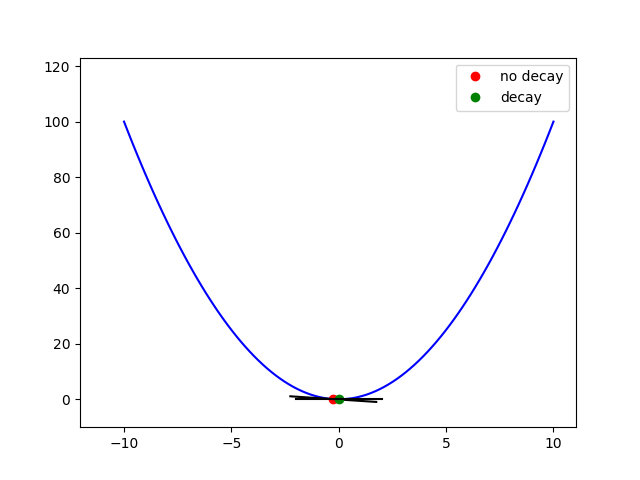

looped ended after 16 iterations
solution with no decay:  -0.25332747903959063
solution with decay:  -4.7802944695901904e-08


In [21]:
# define the left and right boundary of our domain
xR = 10; xL = - xR 
# create the plotting domain
X = np.linspace(xL,xR,100)

# chose a learning rate
alpha = .9

# the learning rate with decay is initially the same
alpha_d = alpha

# chose a decay rate
eta = .9 

# define a tolerance to decide when to stop the algorithm
tol = 1e-1

# chose an initial guess for the root of the minimum
xi = -9

x = xi # solution of the scheme with no decay
xd = xi # solution of the scheme with no decay

# Starting iterations
fig,ax = plt.subplots(1,1)
original = ax.plot(X,square(X), "-", color="b")
conc = ax.plot(x,square(x), "o",color='r')
xder_r = 5
Xder = np.linspace(x+xL/xder_r,x+xR/xder_r,3)
der = ax.plot(Xder,dsquare(x)*Xder-x**2,color='k')
###############
conc_d = ax.plot(xd,square(xd), "o",color='g')
xder_r = 5
Xder_d = np.linspace(xd+xL/xder_r,xd+xR/xder_r,3)
der_d = ax.plot(Xder_d,dsquare(xd)*Xder_d-xd**2,color='k')    
##############
plt.legend([conc[0], conc_d[0]], ['no decay', 'decay'])
fig.canvas.draw()
time.sleep(1)
n_iter = 0

while tol < abs(square(x)):
    n_iter += 1
    conc[0].remove()    
    der[0].remove()
    conc_d[0].remove()    
    der_d[0].remove()    
    x = x - alpha*dsquare(x)
    conc = ax.plot(x,square(x), "o",color='r')
    xder_r = 5
    Xder = np.linspace(x+xL/xder_r,x+xR/xder_r,3)
    der = ax.plot(Xder,dsquare(x)*Xder-x**2,color='k')
    
########
    xd = xd - alpha_d*dsquare(xd)
    alpha_d = eta*alpha_d
    
    conc_d = ax.plot(xd,square(xd), "o",color='g')
    xder_r = 5
    Xder_d = np.linspace(xd+xL/xder_r,xd+xR/xder_r,3)
    der_d = ax.plot(Xder_d,dsquare(xd)*Xder_d-xd**2,color='k')    

#########   
    plt.legend([conc[0], conc_d[0]], ['no decay', 'decay'])
    fig.canvas.draw()
    time.sleep(1)

print('looped ended after',n_iter,'iterations')
print('solution with no decay: ',x)
print('solution with decay: ',xd)